In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from specim.specfuncs import spec1d

## Excluding upto CN lines blueward of Ca K+H and Mg B line.

In [10]:
spec = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[7550, -4000]) #trimsec=[7300, -3500]


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6531.70
 Spectrum End:     8654.17
 Dispersion (1st pixel):   0.25
 Dispersion (average):      0.29



<IPython.core.display.Javascript object>


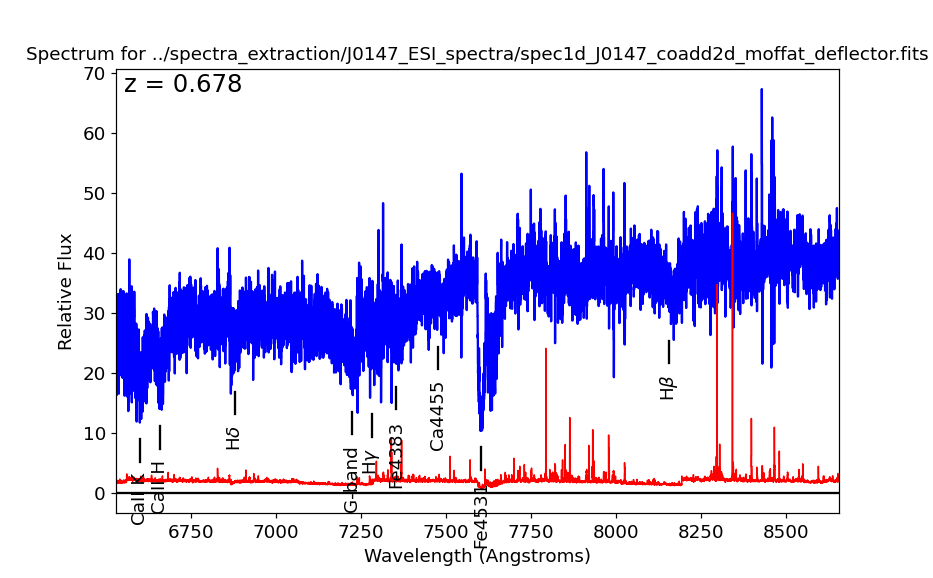


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02
H-beta        4861.00       8156.76



In [197]:
#%matplotlib notebook
#fg = plt.figure(figsize=(10,6))
spec.smooth(1)#, fig=fg
spec.mark_lines('abs', z=0.678, usesmooth=True)
#spec.mark_lines('em', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389932 km/s


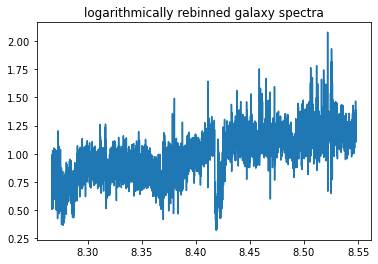

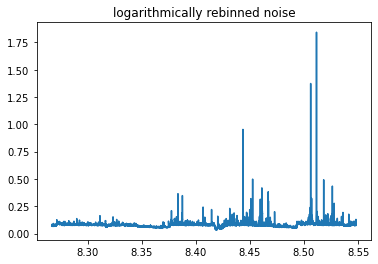

In [12]:
spec.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [13]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -34881.640526 

sigma_diff : 1.302871


In [143]:
mask_reg = np.log(np.array([[6860, 6930], [7570, 7700], [8600, 8660]])/1.678) #[6468, 6530],[7272, 7320],
mask_reg #[7910, 8027], [8426, 8432],  [7237, 7324], [6840, 6950], [7545, 7720],[6395, 6430], [8720, 8780]

array([[8.31586011, 8.32601248],
       [8.41434574, 8.431373  ],
       [8.54191487, 8.54886739]])


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       137       359
chi2/DOF: 1.545; degree = 4; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       139       368
chi2/DOF: 1.544; degree = 5; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       136       356
chi2/DOF: 1.543; degree = 6; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1267

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       136       304
chi2/DOF: 1.527; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

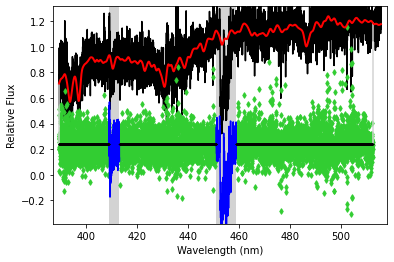

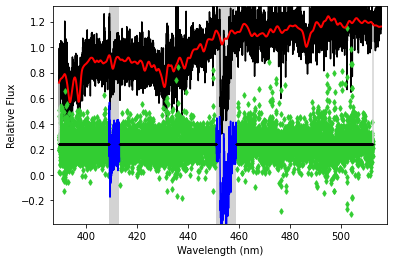

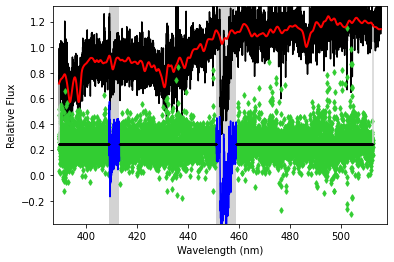

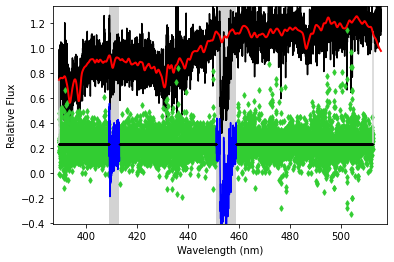

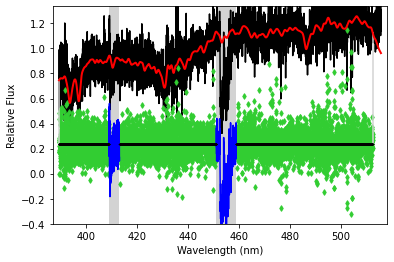

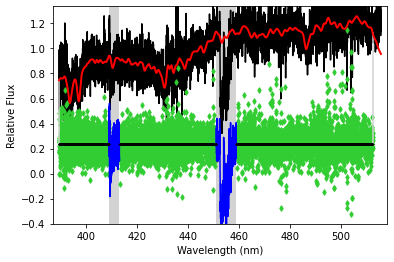

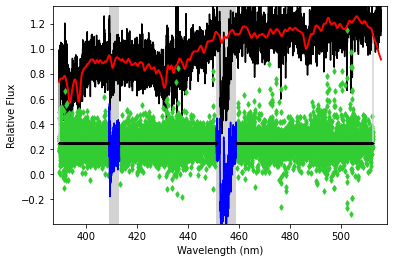

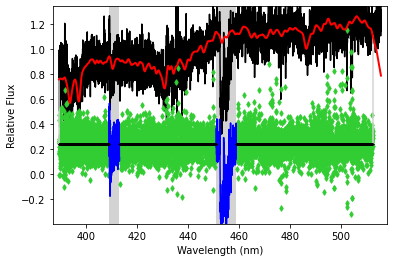

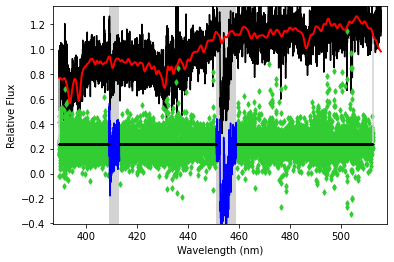

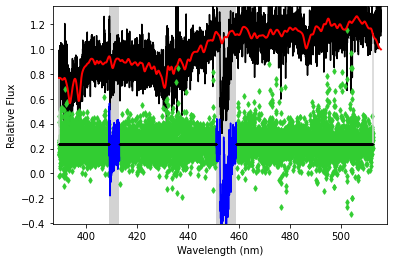

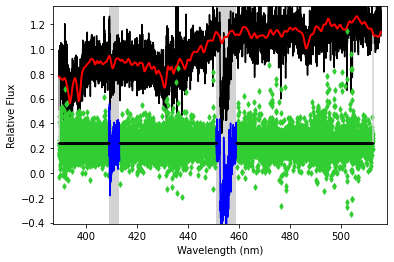

<Figure size 432x288 with 0 Axes>

In [144]:
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 15], mask_reg=mask_reg, show_weight=True, moments=2)

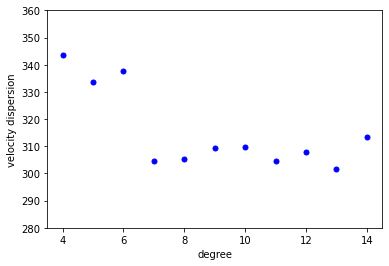

In [111]:
spec.plot_veldis(ylim=[280, 360])

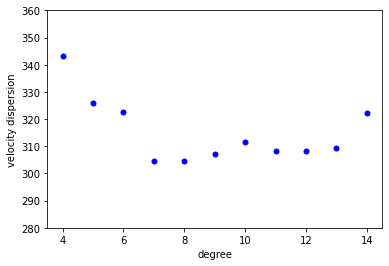

In [104]:
spec.plot_veldis(ylim=[280, 360])

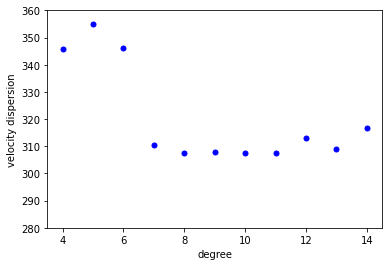

In [62]:
spec.plot_veldis(ylim=[280, 360])


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       160       374
chi2/DOF: 1.518; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       160       375
chi2/DOF: 1.517; degree = 6; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1267

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       161       366
chi2/DOF: 1.516; degree = 7; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       156       349
chi2/DOF: 1.514; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

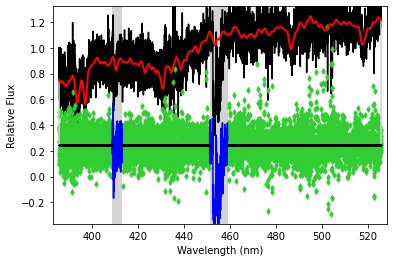

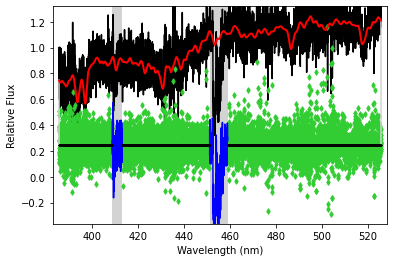

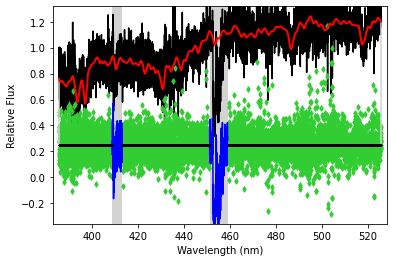

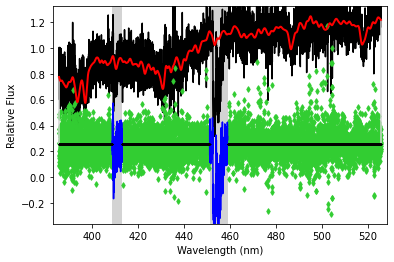

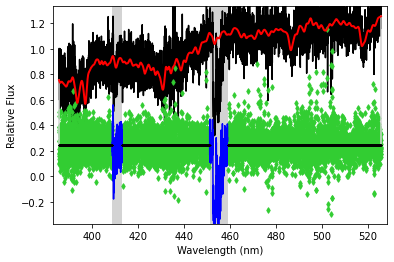

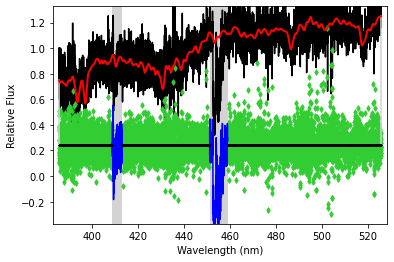

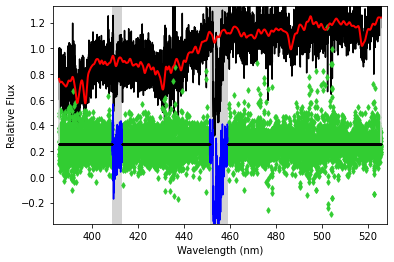

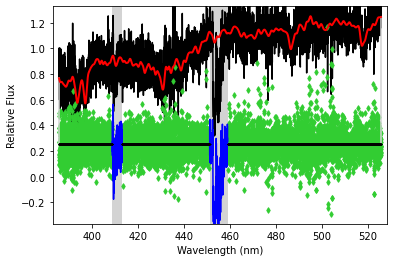

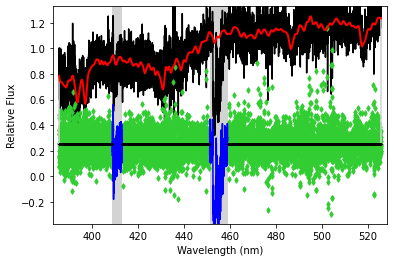

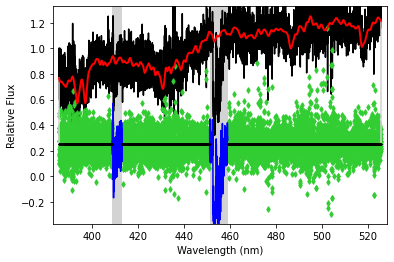

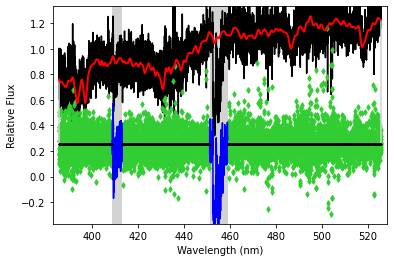

<Figure size 432x288 with 0 Axes>

In [9]:
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 16], mask_reg=mask_reg, show_weight=True, moments=2)

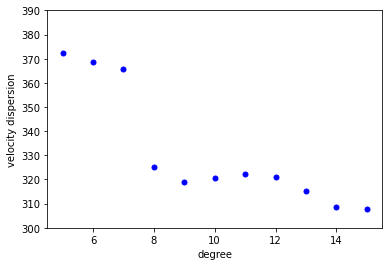

In [46]:
spec.plot_veldis(ylim=[300, 390])

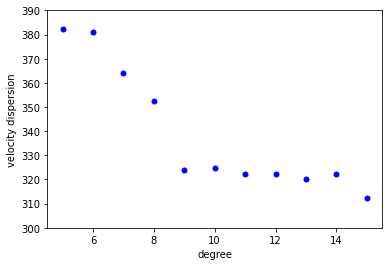

In [9]:
spec.plot_veldis(ylim=[300, 390])

order : 9


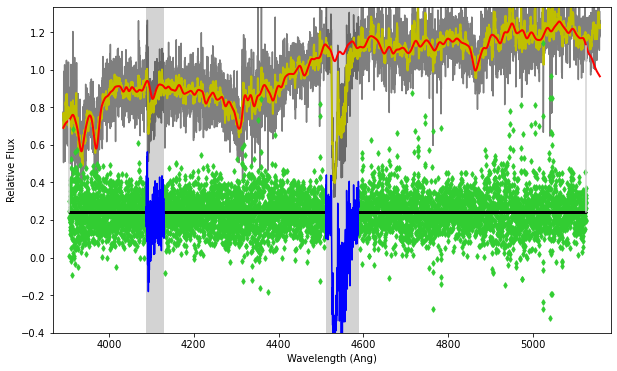

In [51]:
ord_list = np.array([9])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

In [78]:
spec_b = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[7550, 11350])


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6531.70
 Spectrum End:     7545.88
 Dispersion (1st pixel):   0.25
 Dispersion (average):      0.27




Line        lambda_rest  lambda_obs
----------  -----------  -----------
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49



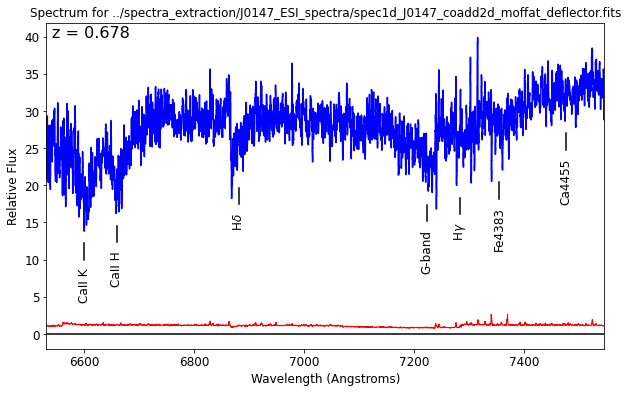

In [79]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(3, fig=fg)
spec_b.mark_lines('abs', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389922 km/s


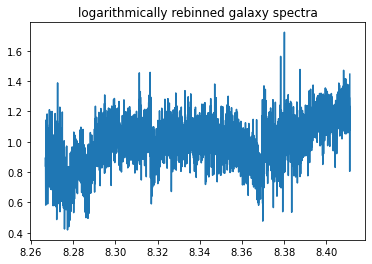

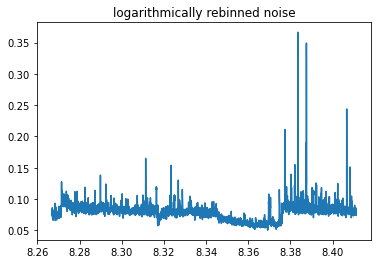

In [88]:
spec_b.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [90]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -34881.640526 

sigma_diff : 1.302871


In [96]:
mask_reg_b = np.log(np.array([[6860, 6930], [7570, 7700])/1.678)


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       121       303
chi2/DOF: 2.004; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       122       300
chi2/DOF: 2.004; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 15; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       122       294
chi2/DOF: 2.001; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 16; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       110       281
chi2/DOF: 1.997; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

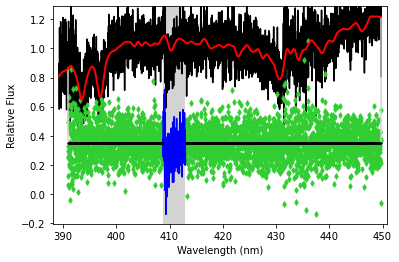

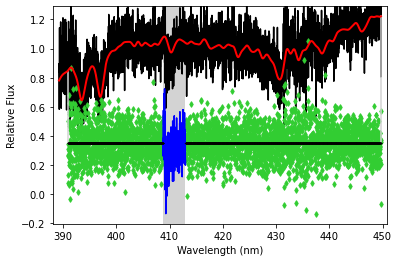

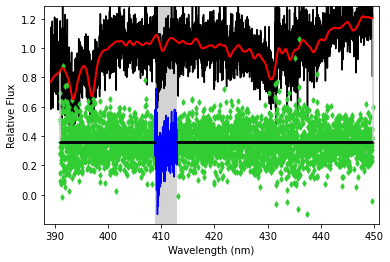

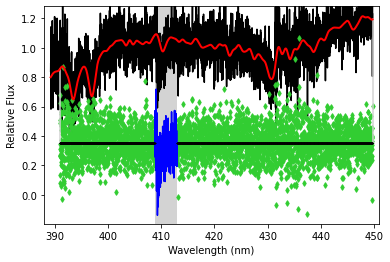

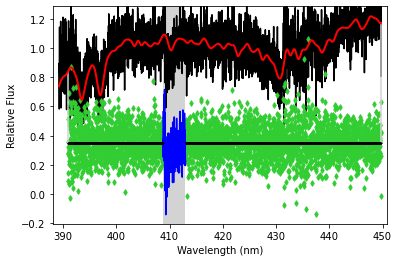

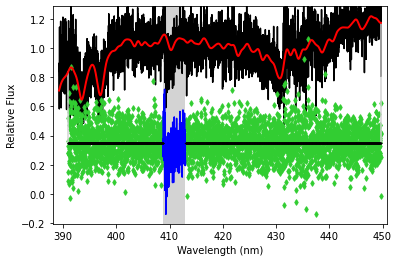

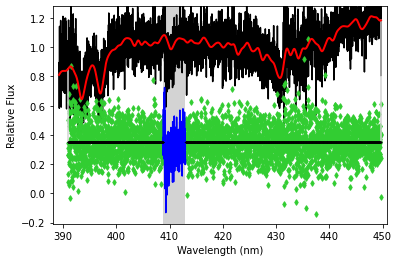

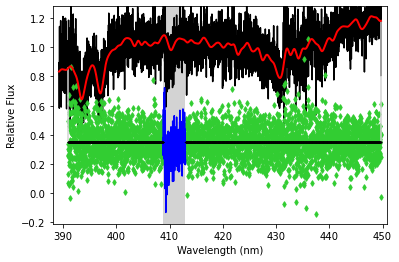

<Figure size 432x288 with 0 Axes>

In [91]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 10], mask_reg=mask_reg, show_weight=True, moments=2)

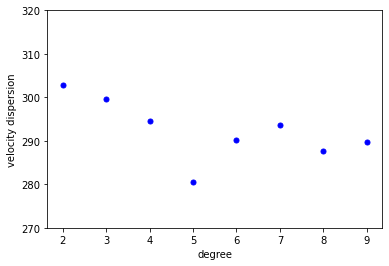

In [94]:
spec_b.plot_veldis(ylim=[270, 320])

order : 6


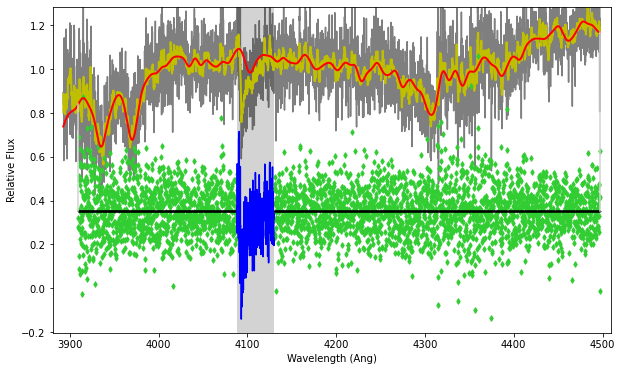

In [95]:
ord_list = np.array([6])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       119       298
chi2/DOF: 2.050; degree = 2; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       119       301
chi2/DOF: 2.050; degree = 3; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       119       302
chi2/DOF: 2.050; degree = 4; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       110       280
chi2/DOF: 2.039; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

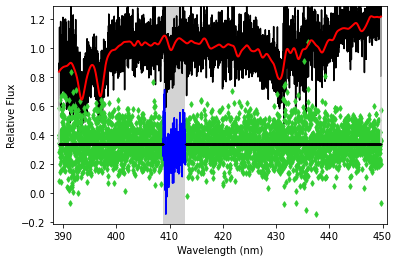

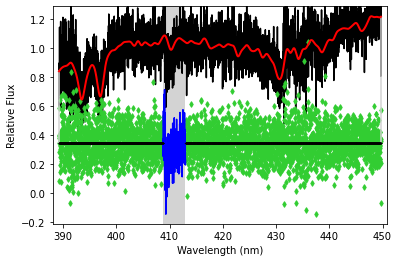

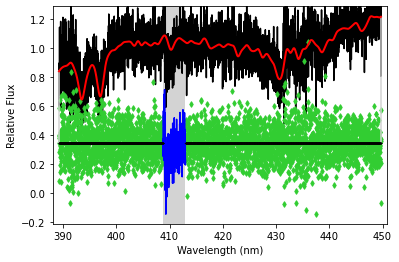

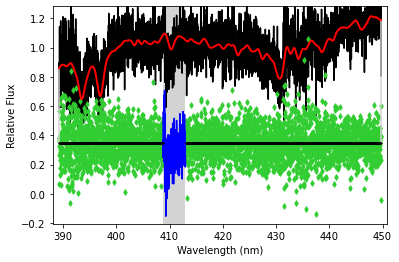

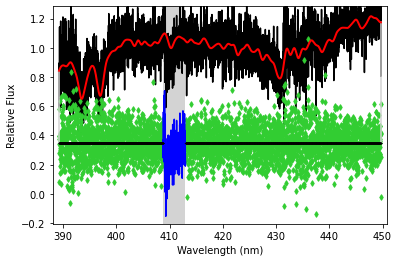

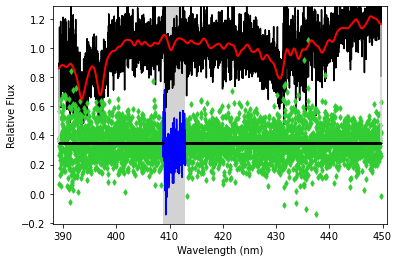

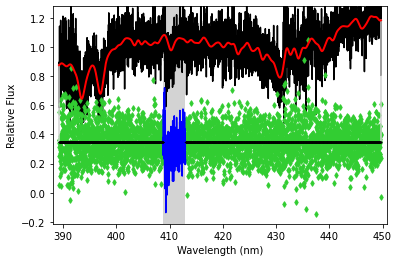

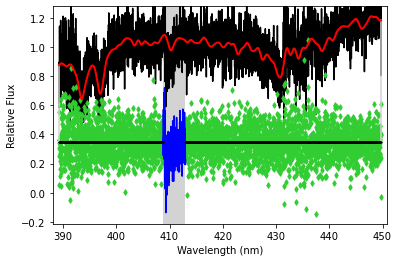

<Figure size 432x288 with 0 Axes>

In [97]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 10], mask_reg=mask_reg_b, show_weight=True, moments=2)

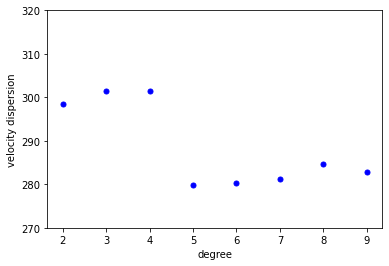

In [98]:
spec_b.plot_veldis(ylim=[270, 320])

order : 6


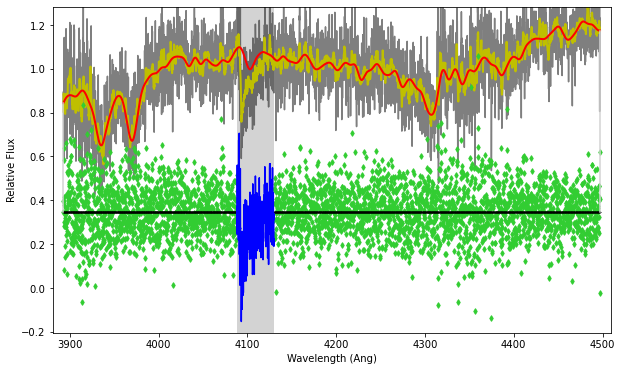

In [99]:
ord_list = np.array([6])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

In [112]:
spec_r = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[11900, -4000])


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  7705.51
 Spectrum End:     8654.17
 Dispersion (1st pixel):   0.29
 Dispersion (average):      0.31




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       8156.76



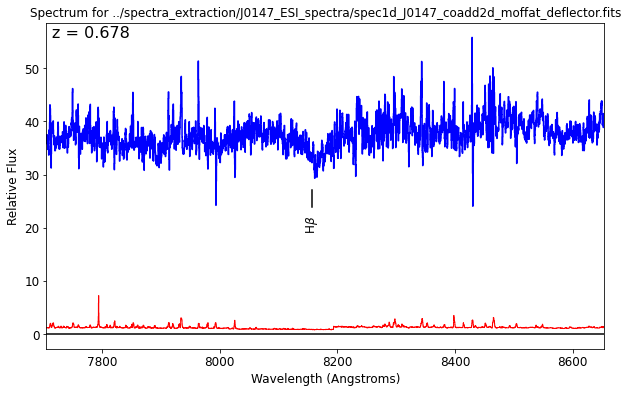

In [113]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(3, fig=fg)
spec_r.mark_lines('abs', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389920 km/s


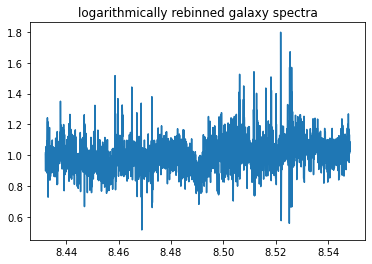

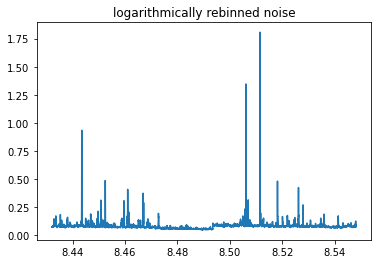

In [114]:
spec_r.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [115]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -84427.753981 

sigma_diff : 1.302871


In [140]:
mask_reg_r = np.log(np.array([[6530, 6560], [6860, 6930], [7570, 7700], [8600, 8660]])/1.678)


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       117       299
chi2/DOF: 1.159; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       112       300
chi2/DOF: 1.154; degree = 3; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       115       272
chi2/DOF: 1.149; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       108       292
chi2/DOF: 1.144; degree = 5; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

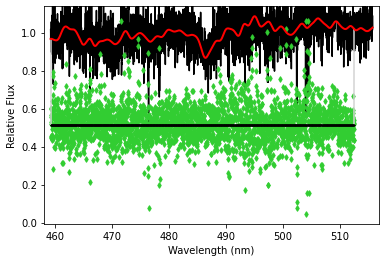

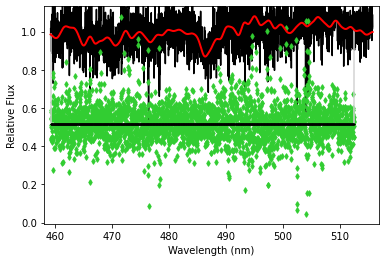

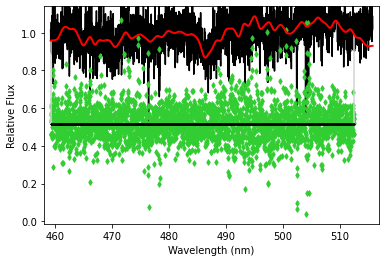

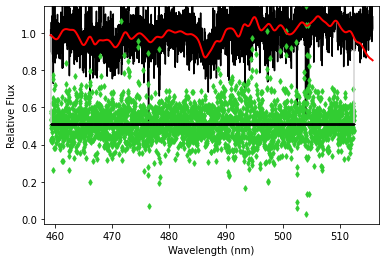

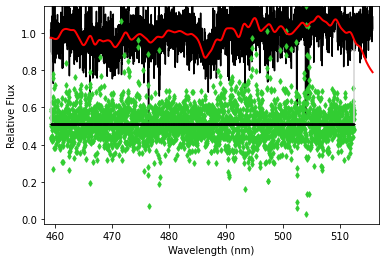

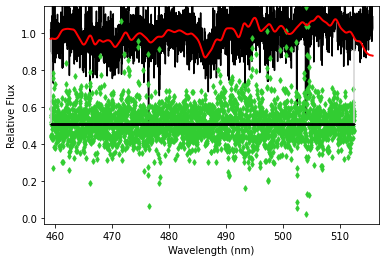

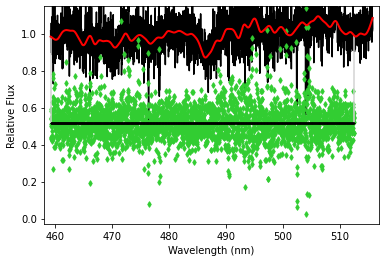

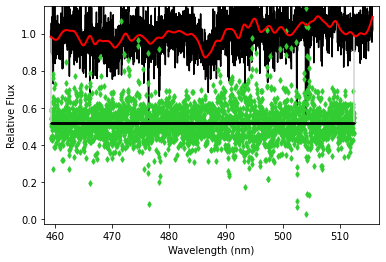

<Figure size 432x288 with 0 Axes>

In [145]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[2, 10], mask_reg=mask_reg, show_weight=True, moments=2)

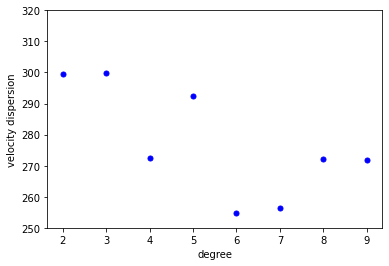

In [134]:
spec_r.plot_veldis(ylim=[250, 320])

In [ ]:
ord_list = np.array([6])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

In [185]:
spec_r1 = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[10900, -4200])


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  7418.25
 Spectrum End:     8588.66
 Dispersion (1st pixel):   0.28
 Dispersion (average):      0.30




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02
H-beta        4861.00       8156.76



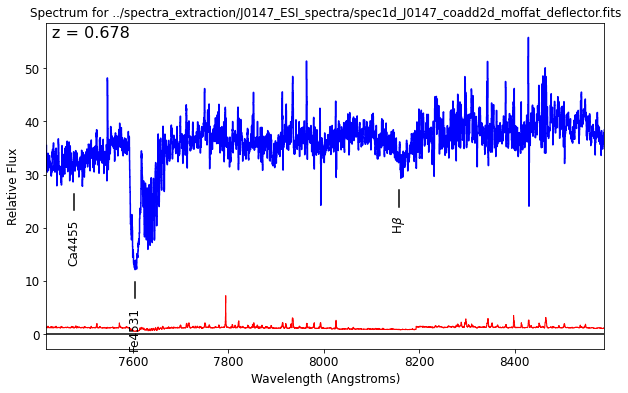

In [186]:
fg = plt.figure(figsize=(10,6))
spec_r1.smooth(3, fig=fg)
spec_r1.mark_lines('abs', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389922 km/s


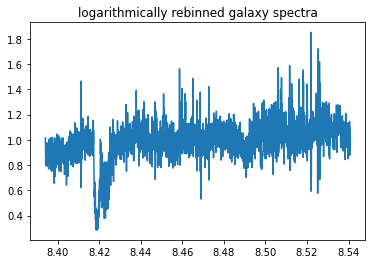

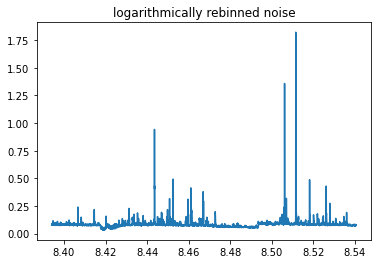

In [187]:
spec_r1.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [188]:
temp_spec_r1 = spec_r1.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -73037.842842 

sigma_diff : 1.302871


In [191]:
mask_reg = np.log(np.array([[6860, 6930], [7570, 7700], [8550, 8660]])/1.678)


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       124       318
chi2/DOF: 1.162; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       126       319
chi2/DOF: 1.162; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       127       321
chi2/DOF: 1.162; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       126       328
chi2/DOF: 1.161; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

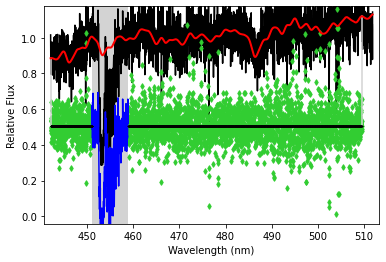

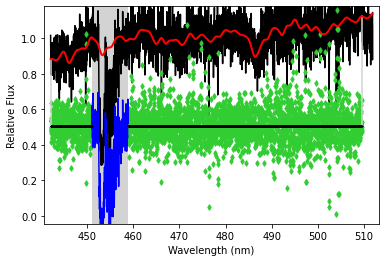

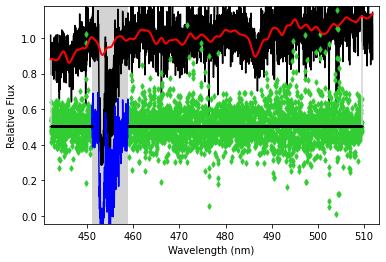

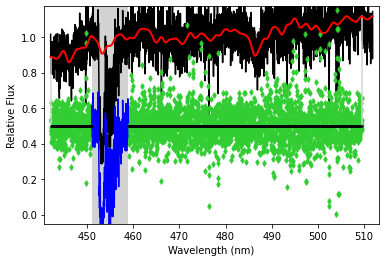

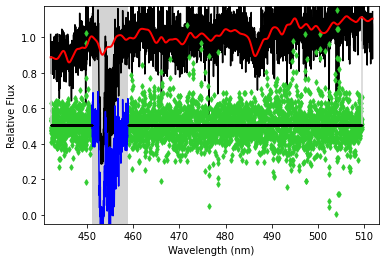

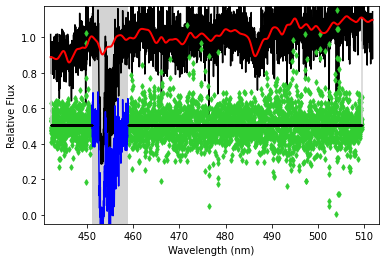

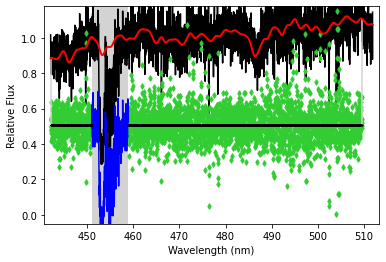

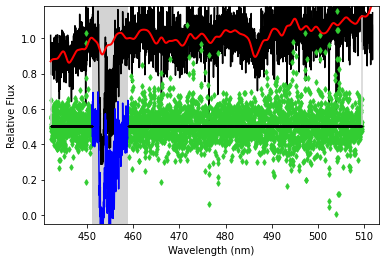

<Figure size 432x288 with 0 Axes>

In [192]:
spec_r1.cal_veldis(temp_spec=temp_spec_r1, degree=[2, 10], mask_reg=mask_reg, show_weight=True, moments=2)

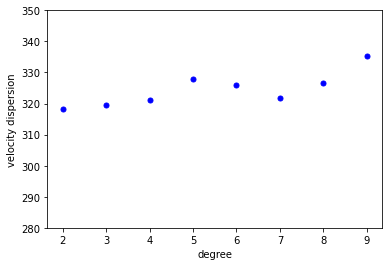

In [194]:
spec_r1.plot_veldis(ylim=[280, 350])

## Including Mg B line

In [2]:
spec1 = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[7550, -3500])


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6531.70
 Spectrum End:     8820.14
 Dispersion (1st pixel):   0.25
 Dispersion (average):      0.29




Line        lambda_rest  lambda_obs
----------  -----------  -----------
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02
H-beta        4861.00       8156.76
Mg I (b)      5176.00       8685.33


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-delta       4101.00       6881.48
H-gamma       4340.00       7282.52
H-beta        4861.00       8156.76
[O III]       4962.00       8326.24
[O III]       5007.00       8401.75
[N I]         5199.00       8723.92



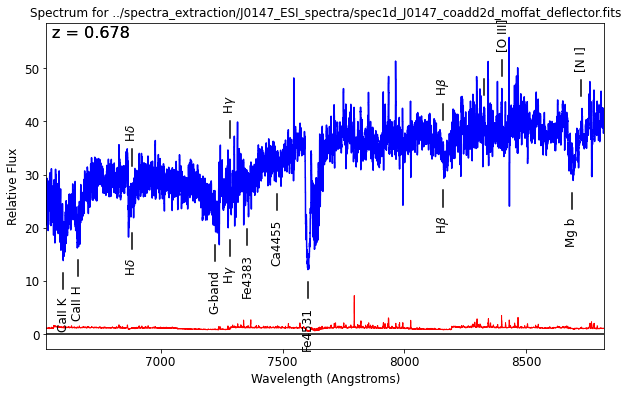

In [3]:
fg = plt.figure(figsize=(10,6))
spec1.smooth(3, fig=fg)
spec1.mark_lines('abs', z=0.678, usesmooth=True)
spec1.mark_lines('em', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389933 km/s


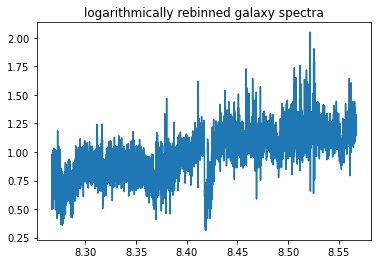

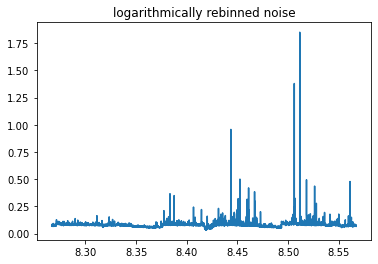

In [4]:
spec1.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [5]:
temp_spec1 = spec1.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -34881.640526 

sigma_diff : 1.302871


In [6]:
mask_reg1 = np.log(np.array([[6860, 6930], [7570, 7700],  [8449, 8470]])/1.678)
#, [8600, 8660], [8600, 8650]
mask_reg1

array([[8.31586011, 8.32601248],
       [8.41434574, 8.431373  ],
       [8.52420076, 8.52668318]])


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       154       363
chi2/DOF: 1.449; degree = 5; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       151       357
chi2/DOF: 1.448; degree = 6; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       158       360
chi2/DOF: 1.447; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       147       323
chi2/DOF: 1.440; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       

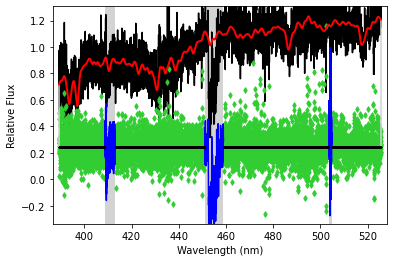

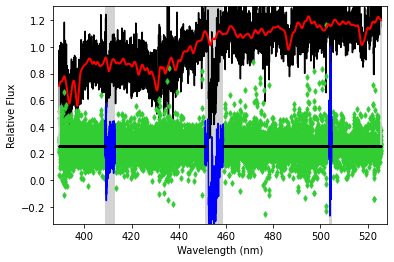

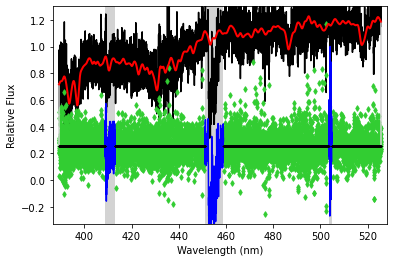

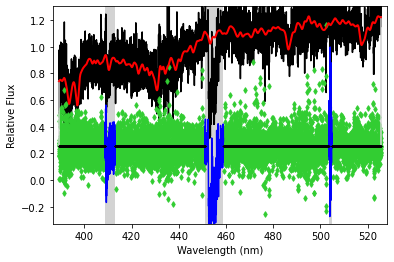

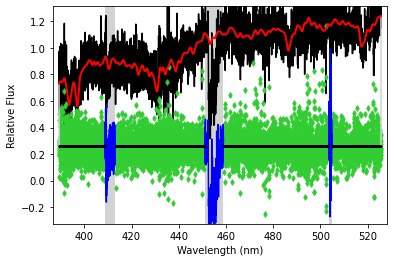

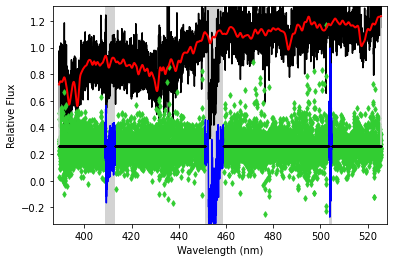

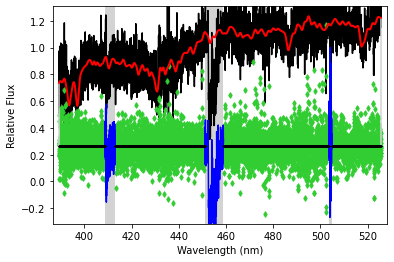

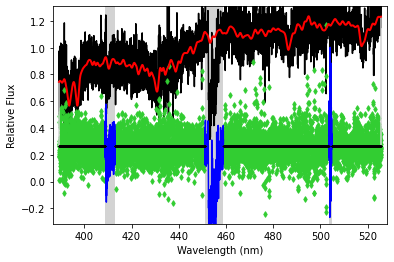

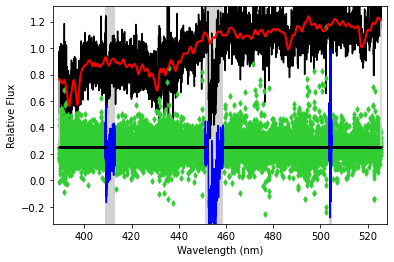

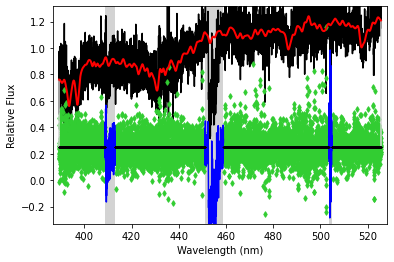

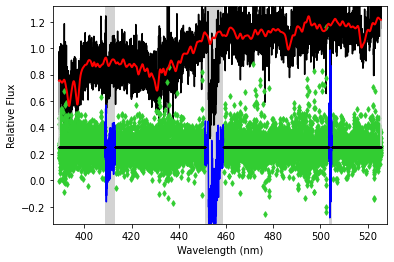

<Figure size 432x288 with 0 Axes>

In [7]:
spec1.cal_veldis(temp_spec=temp_spec1, degree=[5, 16], mask_reg=mask_reg1, show_weight=True, moments=2)

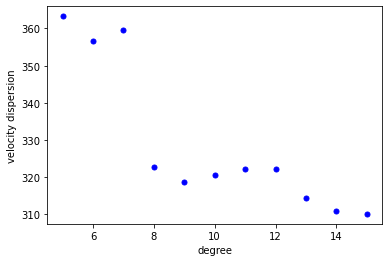

In [8]:
spec1.plot_veldis()

order : 6


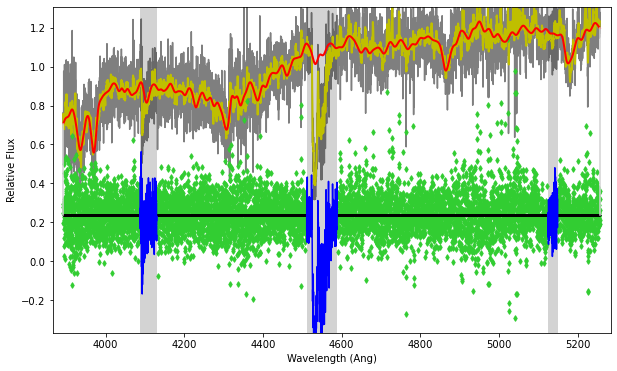

In [160]:
ord_list = np.array([6])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec1.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

In [72]:
spec_b = spec = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[7300, 11800])


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6469.96
 Spectrum End:     7676.00
 Dispersion (1st pixel):   0.25
 Dispersion (average):      0.27



<IPython.core.display.Javascript object>


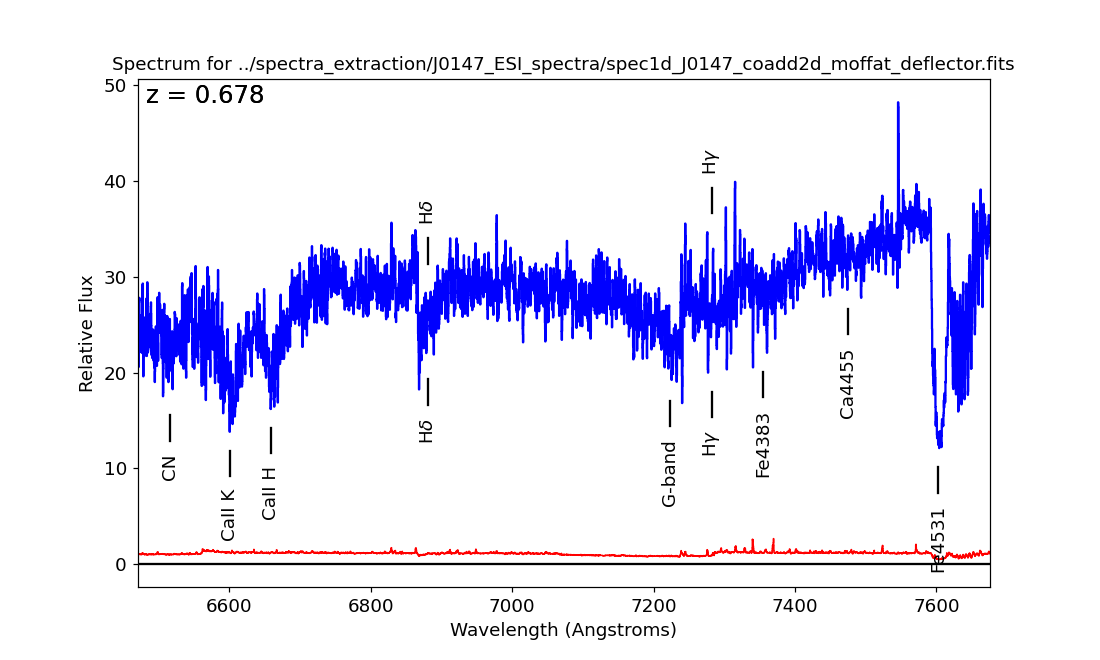


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       6515.67
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-delta       4101.00       6881.48
H-gamma       4340.00       7282.52



In [73]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(3, fig=fg)
spec_b.mark_lines('abs', z=0.678, usesmooth=True)
spec_b.mark_lines('em', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389923 km/s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


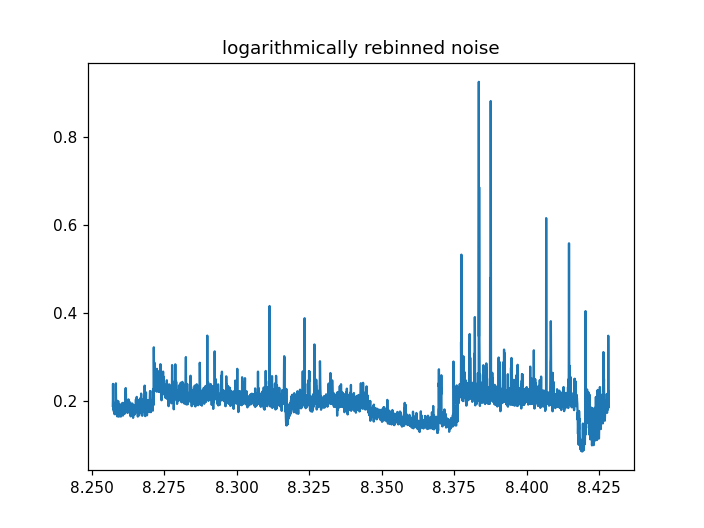

In [76]:
spec_b.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=250, noise_scale=0.2)

In [77]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.2)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -32034.162741 

sigma_diff : 1.068899


In [83]:
mask_reg_b = np.log(np.array([[6469, 6530], [6840, 6950], [7565, 7720]])/1.678)
mask_reg_b #[7910, 8027], [8426, 8432],  [7237, 7324],

array([[8.25717421, 8.26655961],
       [8.3129404 , 8.32889433],
       [8.41368502, 8.43396703]])


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       105       280
chi2/DOF: 0.3280; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268


<IPython.core.display.Javascript object>


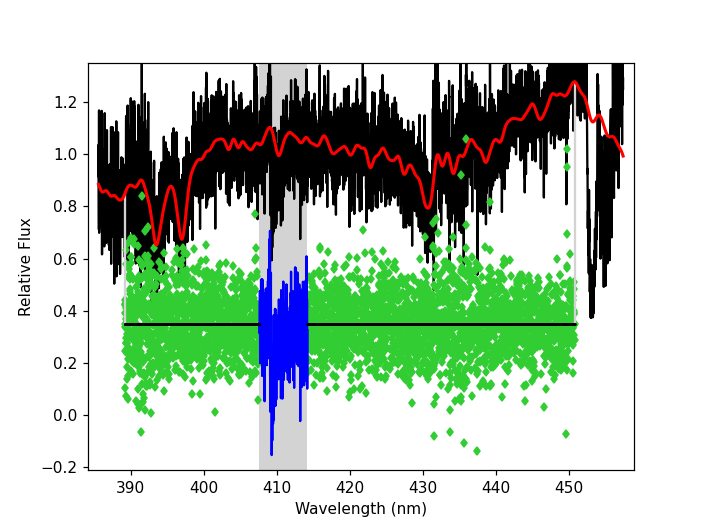


degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       105       278
chi2/DOF: 0.3278; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268


<IPython.core.display.Javascript object>


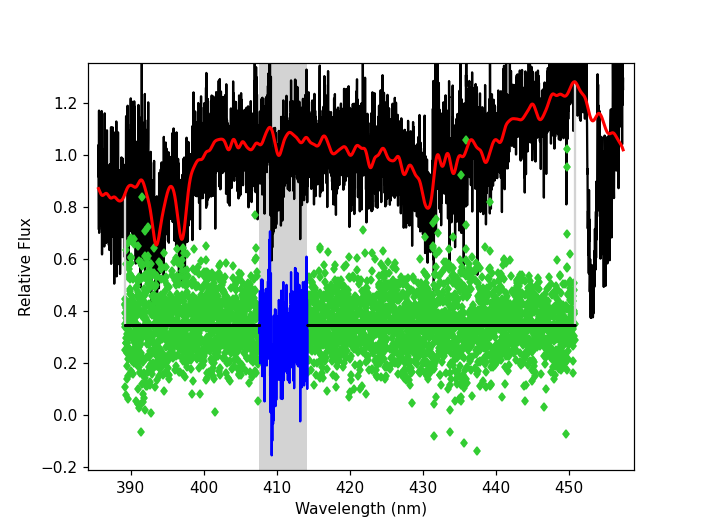


degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       105       278
chi2/DOF: 0.3278; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268


<IPython.core.display.Javascript object>


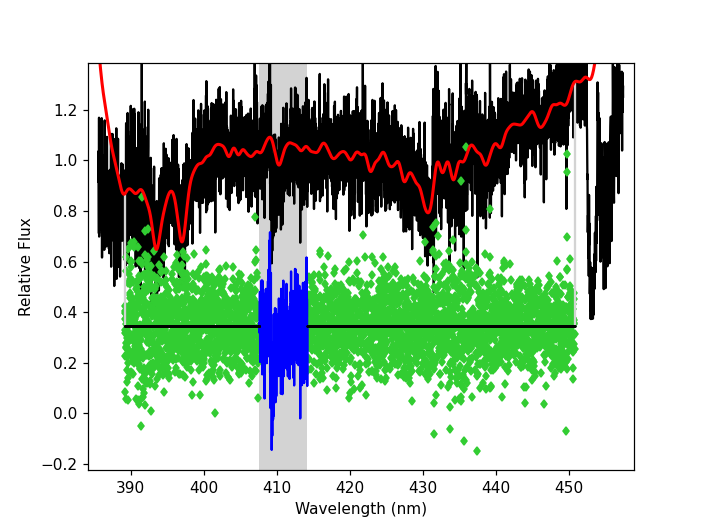


degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       106       286
chi2/DOF: 0.3265; degree = 8; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268


<IPython.core.display.Javascript object>


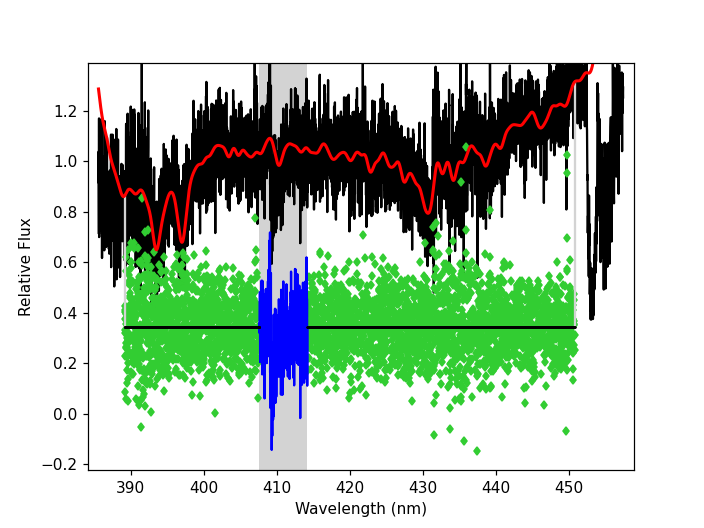


degree : 9
 Best Fit:       Vel     sigma
 comp.  0:       101       281
chi2/DOF: 0.3265; degree = 9; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268


<IPython.core.display.Javascript object>


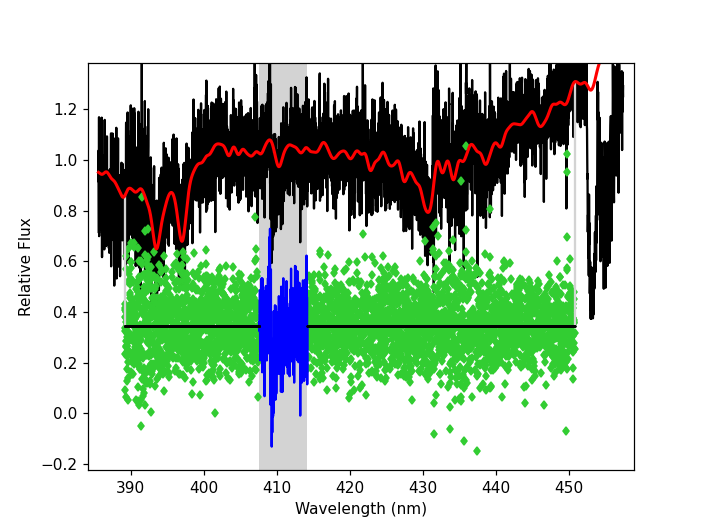


degree : 10
 Best Fit:       Vel     sigma
 comp.  0:       103       278
chi2/DOF: 0.3264; degree = 10; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268


<IPython.core.display.Javascript object>


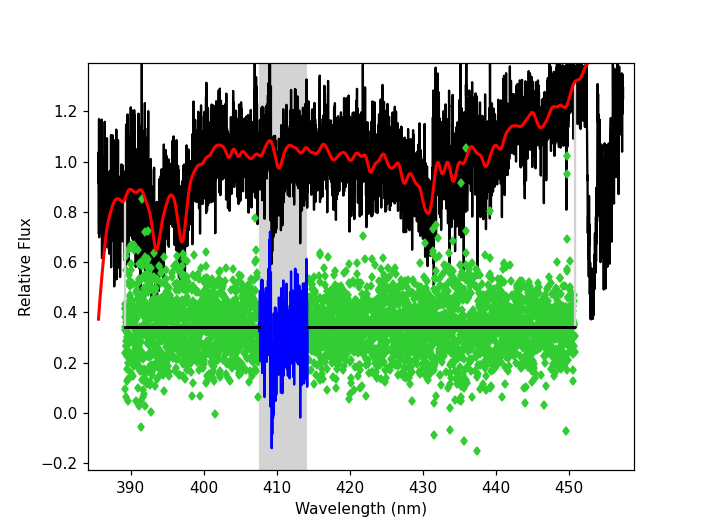


degree : 11
 Best Fit:       Vel     sigma
 comp.  0:       107       277
chi2/DOF: 0.3263; degree = 11; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268


<IPython.core.display.Javascript object>


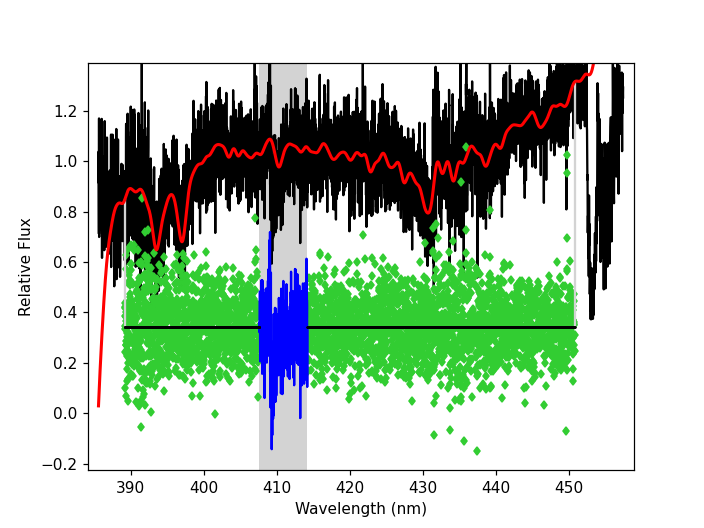


degree : 12
 Best Fit:       Vel     sigma
 comp.  0:       106       277
chi2/DOF: 0.3263; degree = 12; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268


<IPython.core.display.Javascript object>


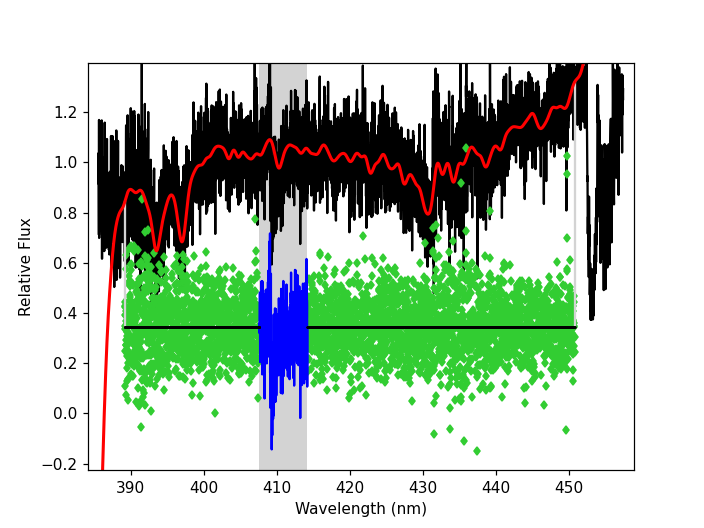


degree : 13
 Best Fit:       Vel     sigma
 comp.  0:       111       282
chi2/DOF: 0.3262; degree = 13; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 16; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268


<IPython.core.display.Javascript object>


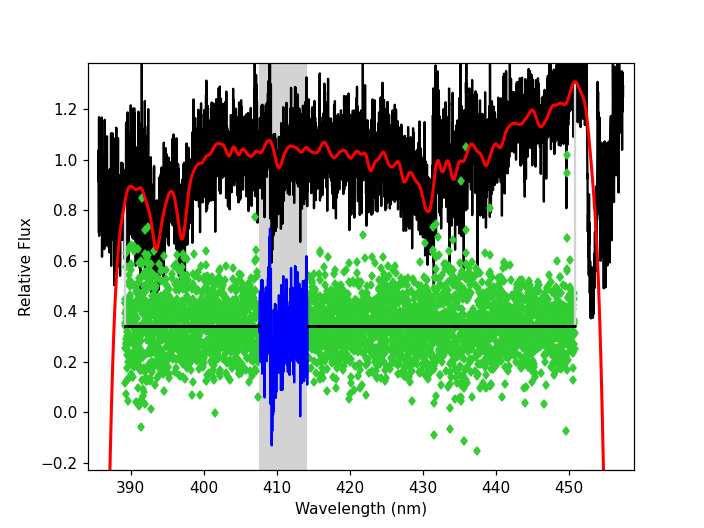


degree : 14
 Best Fit:       Vel     sigma
 comp.  0:       114       282
chi2/DOF: 0.3260; degree = 14; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268


<IPython.core.display.Javascript object>


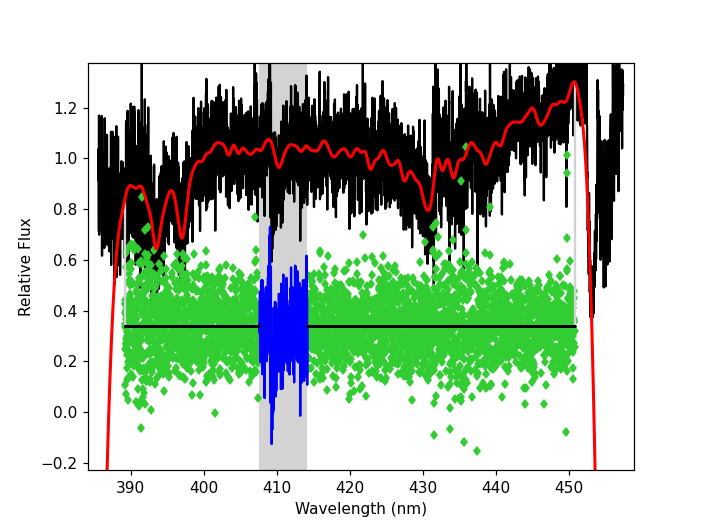


degree : 15
 Best Fit:       Vel     sigma
 comp.  0:       111       278
chi2/DOF: 0.3260; degree = 15; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268


<IPython.core.display.Javascript object>


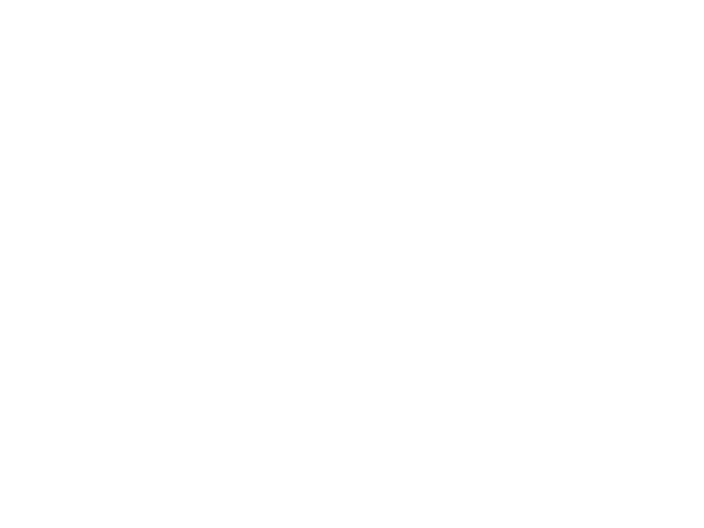

In [84]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[5, 16], mask_reg=mask_reg_b, show_weight=True, moments=2)

<IPython.core.display.Javascript object>


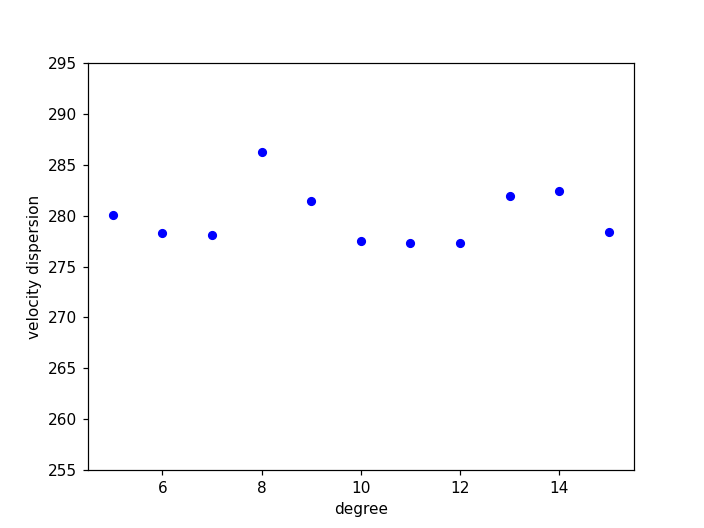

In [85]:
spec_b.plot_veldis(ylim=[255, 295])

In [165]:
spec1_r = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[11950, -3500]) #[11800, -3500]


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  7720.16
 Spectrum End:     8820.14
 Dispersion (1st pixel):   0.29
 Dispersion (average):      0.31




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       8156.76
Mg I (b)      5176.00       8685.33



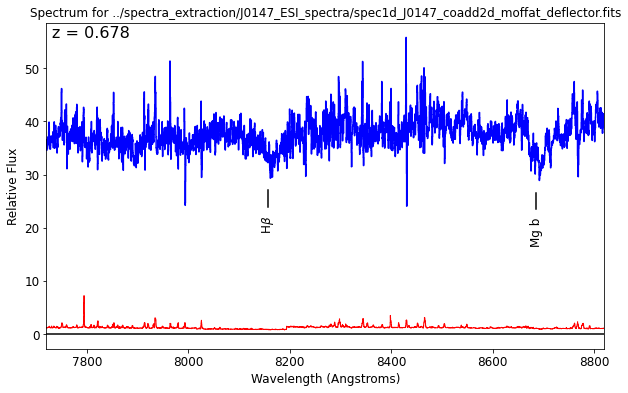

In [166]:
fg = plt.figure(figsize=(10,6))
spec1_r.smooth(3, fig=fg)
spec1_r.mark_lines('abs', z=0.678, usesmooth=True)
#spec_r.mark_lines('em', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389921 km/s


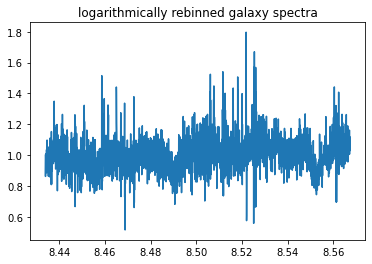

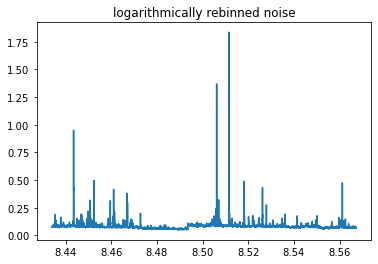

In [167]:
spec1_r.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

In [168]:
temp_spec1_r = spec1_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -84997.249537 

sigma_diff : 1.302871


In [16]:
mask_reg_r = np.log(np.array([[6469, 6530], [6840, 6950], [7545, 7720]])/1.678)
mask_reg = np.log(np.array([[6860, 6930], [7570, 7700], [8600, 8900]])/1.678)
mask_reg_r #[7910, 8027], [8426, 8432],  [7237, 7324], [8228, 8245] , [8440, 8484] [8720, 8780]

array([[8.25717421, 8.26655961],
       [8.3129404 , 8.32889433],
       [8.41103776, 8.43396703]])


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       130       328
chi2/DOF: 1.113; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       126       325
chi2/DOF: 1.108; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       126       325
chi2/DOF: 1.108; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       121       318
chi2/DOF: 1.107; degree = 5; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

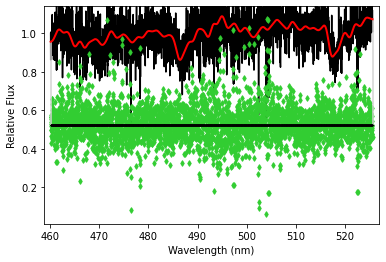

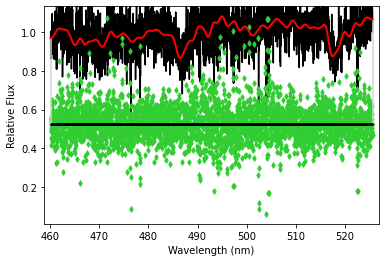

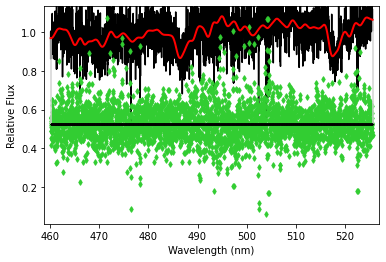

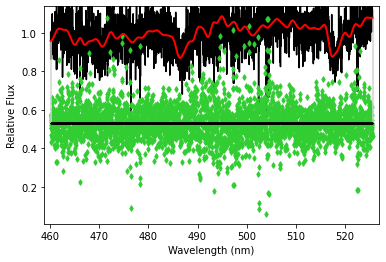

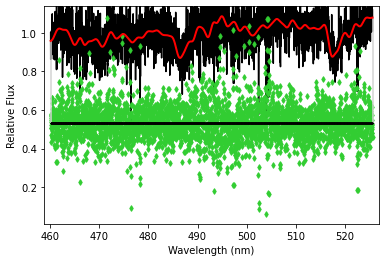

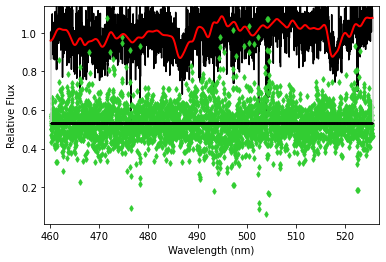

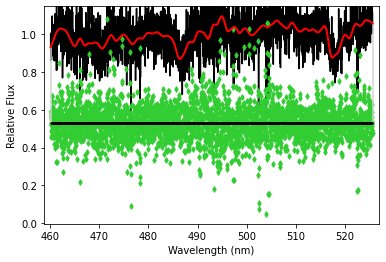

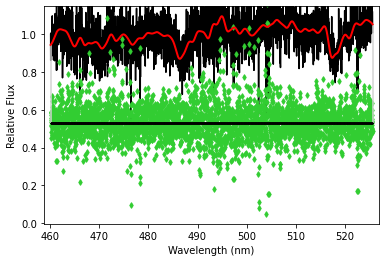

<Figure size 432x288 with 0 Axes>

In [173]:
spec1_r.cal_veldis(temp_spec=temp_spec1_r, degree=[2, 10], mask_reg=mask_reg1, show_weight=True, moments=2)

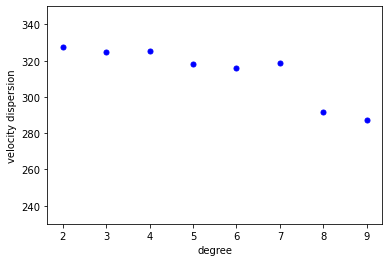

In [174]:
spec1_r.plot_veldis(ylim=[230, 350])

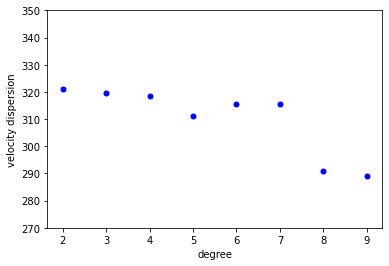

In [13]:
spec_r.plot_veldis(ylim=[270, 350])

order : 6


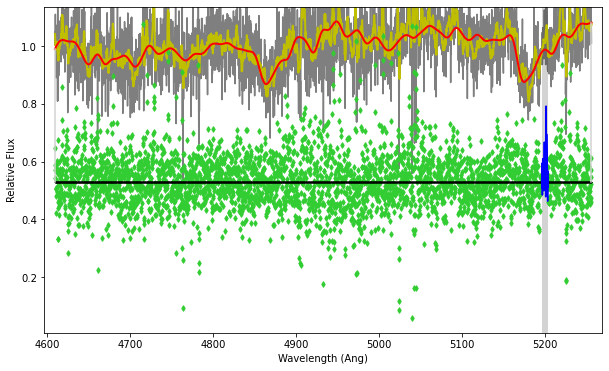

In [17]:
ord_list = np.array([6])
for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

In [ ]:
spec.